# 7. Hafta Lab-3: Yapay Sinir Ağları
## BGM 565: Siber Güvenlik için Makine Öğrenme Yöntemleri
## İstanbul Şehir Üni. - Bilgi Güvenliği Müh.
### Dr. Ferhat Özgür Çatak

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from IPython.display import Image

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\user\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model

In [3]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

In [4]:
# ilgili kolonlari sec
secilecek_kolonlar = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells',
'num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']
X = verikumesi[secilecek_kolonlar].as_matrix()
Y = verikumesi['label']

### Label encoder

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

### Yapay sinir ağı modeli oluştur

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(20, activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(10, activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(dummy_y.shape[1], activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

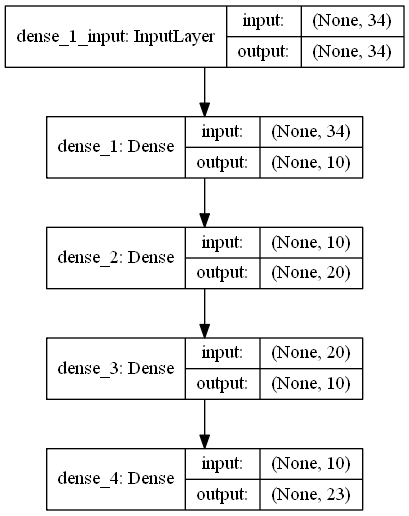

In [7]:
plot_model(model, show_shapes=True, to_file="multiclass.png")
Image("multiclass.png")

In [8]:
history = model.fit(X, dummy_y, epochs=30, batch_size=1024, verbose=1, validation_split=0.33)

Train on 330993 samples, validate on 163027 samples
Epoch 1/30
330993/330993 [==============================] - 6s 18us/step - loss: 2.0177 - acc: 0.4643 - val_loss: 1.5014 - val_acc: 0.4247
Epoch 2/30
330993/330993 [==============================] - 5s 15us/step - loss: 1.1244 - acc: 0.6392 - val_loss: 1.3699 - val_acc: 0.4247
Epoch 3/30
330993/330993 [==============================] - 5s 15us/step - loss: 1.0309 - acc: 0.6392 - val_loss: 1.3584 - val_acc: 0.4247
Epoch 4/30
330993/330993 [==============================] - 5s 15us/step - loss: 1.0025 - acc: 0.6392 - val_loss: 1.3428 - val_acc: 0.4247
Epoch 5/30
330993/330993 [==============================] - 5s 16us/step - loss: 0.9458 - acc: 0.6392 - val_loss: 1.2640 - val_acc: 0.4247
Epoch 6/30
330993/330993 [==============================] - 5s 15us/step - loss: 0.8153 - acc: 0.6392 - val_loss: 1.0577 - val_acc: 0.4247
Epoch 7/30
330993/330993 [==============================] - 5s 15us/step - loss: 0.6291 - acc: 0.7039 - val_loss: 

### Sınıflandırma modelinin performansına bakalım.

In [9]:
y_pred = model.predict_classes(X)

### Confusion Matrix

In [11]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(encoded_Y, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,2166,0,37,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,7,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,8,0,0,0,0
5,0,0,0,0,0,898,0,0,0,98,0,251,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,27,0,0,0,107144,0,17,0,0,0,0,0,0,13,0,0,0,0


In [12]:
accuracy_score(encoded_Y, y_pred)

0.982816485162544

### Eğitim tarihçesini inceliyelim.

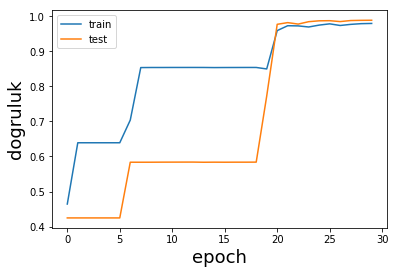

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

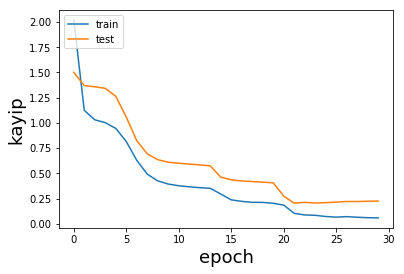

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### Model karmaşıklığını artıralım

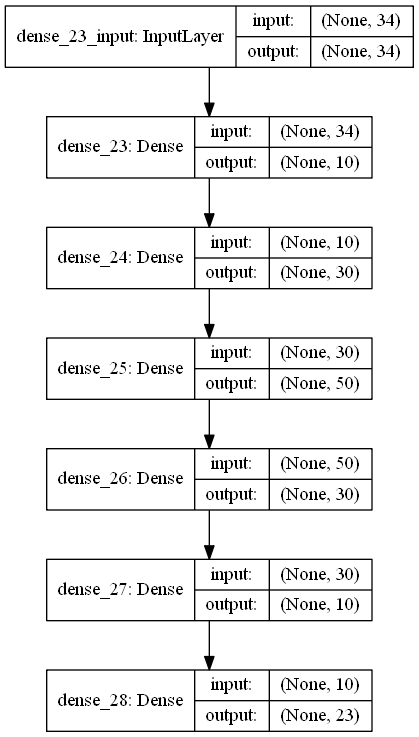

In [21]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(30, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(50, activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(30, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(10, activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(dummy_y.shape[1], activation='softmax', kernel_initializer='uniform'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

plot_model(model, show_shapes=True, to_file="multiclass.png")
Image("multiclass.png")

### Modeli eğitelim

In [22]:
history = model.fit(X, dummy_y, epochs=30, batch_size=1024, verbose=1, validation_split=0.33)

Train on 330993 samples, validate on 163027 samples
Epoch 1/30
330993/330993 [==============================] - 11s 34us/step - loss: 1.4942 - acc: 0.6426 - val_loss: 1.3833 - val_acc: 0.4247
Epoch 2/30
330993/330993 [==============================] - 9s 28us/step - loss: 1.0023 - acc: 0.6392 - val_loss: 1.4843 - val_acc: 0.4260
Epoch 3/30
330993/330993 [==============================] - 9s 29us/step - loss: 0.5249 - acc: 0.8395 - val_loss: 0.2627 - val_acc: 0.9878
Epoch 4/30
330993/330993 [==============================] - 9s 29us/step - loss: 0.1734 - acc: 0.9802 - val_loss: 0.1433 - val_acc: 0.9861
Epoch 5/30
330993/330993 [==============================] - 9s 27us/step - loss: 0.1272 - acc: 0.9803 - val_loss: 0.0932 - val_acc: 0.9897
Epoch 6/30
330993/330993 [==============================] - 9s 27us/step - loss: 0.0990 - acc: 0.9815 - val_loss: 0.1749 - val_acc: 0.9496
Epoch 7/30
330993/330993 [==============================] - 9s 27us/step - loss: 0.0829 - acc: 0.9834 - val_loss:

### Sınıflandırma modelinin performansına bakalım.

In [23]:
y_pred = model.predict_classes(X)

### Confusion Matrix

In [24]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(encoded_Y, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,2203,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,8,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1190,0,0,0,11,0,34,0,0,0,4,0,6,0,0,2,0,0
6,0,0,0,0,0,9,0,0,0,1,0,0,0,0,0,6,0,5,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,91075,0,10,0,0,0,3741,0,12375,0,0,0,0,0


In [25]:
accuracy_score(encoded_Y, y_pred)

0.8499251042467916

### Eğitim tarihçesini inceliyelim.

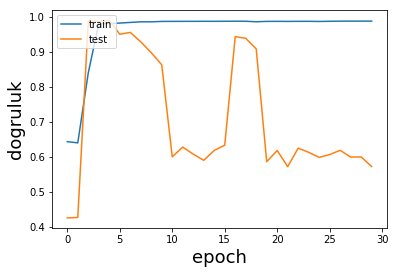

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

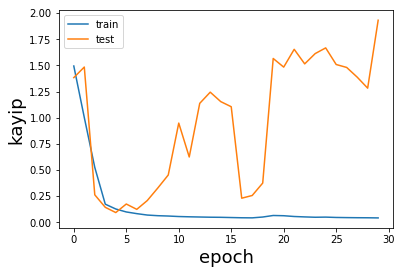

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### Binary classification

In [28]:
y = verikumesi['label'].apply(lambda d:0 if d == 'normal.' else 1).as_matrix()

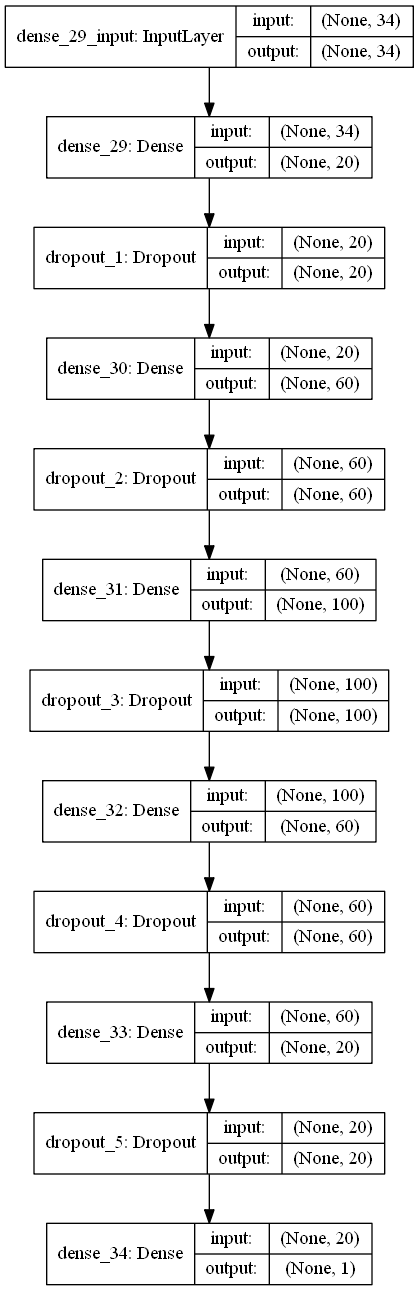

In [29]:
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(60, input_dim=X.shape[1], activation='relu', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(60, input_dim=X.shape[1], activation='relu', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(20, activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

plot_model(model, show_shapes=True, to_file="multiclass.png")
Image("multiclass.png")

In [30]:
history = model.fit(X, y, epochs=30, batch_size=1024, verbose=1, validation_split=0.2)

Train on 395216 samples, validate on 98804 samples
Epoch 1/30
395216/395216 [==============================] - 13s 33us/step - loss: 0.1775 - acc: 0.9416 - val_loss: 0.0223 - val_acc: 0.9966
Epoch 2/30
395216/395216 [==============================] - 11s 28us/step - loss: 0.0348 - acc: 0.9892 - val_loss: 0.0142 - val_acc: 0.9969
Epoch 3/30
395216/395216 [==============================] - 11s 27us/step - loss: 0.0275 - acc: 0.9899 - val_loss: 0.0149 - val_acc: 0.9964
Epoch 4/30
395216/395216 [==============================] - 11s 28us/step - loss: 0.0259 - acc: 0.9899 - val_loss: 0.0134 - val_acc: 0.9965
Epoch 5/30
395216/395216 [==============================] - 11s 28us/step - loss: 0.0267 - acc: 0.9902 - val_loss: 0.0143 - val_acc: 0.9973
Epoch 6/30
395216/395216 [==============================] - 13s 32us/step - loss: 0.0258 - acc: 0.9902 - val_loss: 0.0123 - val_acc: 0.9964- loss: 0.0259 - acc: 0.990 - ETA: 0s - loss: 0.0259
Epoch 7/30
395216/395216 [==============================]

### Sınıflandırma modelinin performansına bakalım.

In [ ]:
y_pred = model.predict_classes(X)

In [ ]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(y, y_pred)
cm = pd.DataFrame(cm)
cm

In [ ]:
accuracy_score(y, y_pred)

### Eğitim tarihçesini inceliyelim.

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()